In [74]:
import numpy as np
import pandas as pd

In [75]:
import nltk
from nltk.corpus import stopwords
from gensim.models import ldamodel
import gensim.corpora

In [76]:
data = pd.read_csv('video_data.csv')

In [77]:
data.shape

(5585, 5)

In [121]:
data['category_name'].value_counts()

India News                  2103
Entertainment News          1977
Sports News                  587
World News                   318
R Bharat                     269
Technology News              130
Business News                 78
Lifestyle                     77
Initiatives                   37
Karnataka Elections 2018       9
Name: category_name, dtype: int64

In [78]:
data.head(5)

,video_id,category_name,short_description,story_text,title
0,5653616771001,Entertainment News,The 34-year-old actor is not sure if he's goin...,Hack: \tThe 34-year-old actor is not sure if h...,Adam Driver still 'undecided' on seeing 'Star ...
1,5631919940001,Entertainment News,The poster gives us a closer look at the actor...,The latest poster of 2.0 featuring Bollywood s...,"BEWARE: Akshay Kumar's look from 2.0 is out, a..."
2,5767901401001,India News,A massive outrage has erupted over the horrifi...,A massive outrage has erupted over the horrifi...,Kathua-Rape-Murder Case: Protesters demand CBI...
3,5741125480001,India News,"According to forensic report, traces of alcoho...",The mystery surrounding Sridevi’s passing away...,Sridevi’s death: Here’s what Amar Singh claims...
4,5746648010001,Entertainment News,After her national award winning first film 'N...,After her national award winning first film 'N...,Churni's next film on social media affecting p...


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

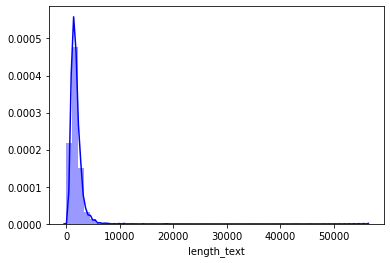

In [80]:
data['length_text'] = data['story_text'].str.len()
sns.distplot(data['length_text'], color="b")
plt.show()

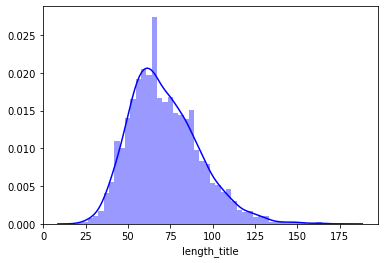

In [81]:
data['length_title'] = data['title'].str.len()
sns.distplot(data['length_title'], color="b")
plt.show()

In [82]:
titles = [x for x in data['title']]
docs = [x for x in data['story_text']]

In [83]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ravissa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

### Data Preprocessing

In [85]:
# A function to prepare the text for topic modelling
def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in stop_words]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

In [86]:
import re
import string

In [87]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [88]:
nltk.download('wordnet')
docs = [words(x) for x in data['story_text']]

[nltk_data] Downloading package wordnet to /Users/ravissa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
from gensim.corpora import Dictionary

In [90]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initial documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initial documents: 78180
Number of unique words after removing rare and common words: 8588


In [91]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
#print(len(corpus))
#corpus[336]
bow_doc_300 = corpus[300]

for i in range(len(bow_doc_300)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_300[i][0], 
                                                     dictionary[bow_doc_300[i][0]], 
                                                     bow_doc_300[i][1]))

Word 3 ("always") appears 1 time.
Word 8 ("back") appears 1 time.
Word 12 ("come") appears 1 time.
Word 40 ("hit") appears 1 time.
Word 43 ("interview") appears 1 time.
Word 91 ("tv") appears 1 time.
Word 151 ("accused") appears 1 time.
Word 194 ("congress") appears 5 time.
Word 197 ("country") appears 2 time.
Word 235 ("group") appears 1 time.
Word 303 ("party") appears 1 time.
Word 309 ("political") appears 1 time.
Word 381 ("tuesday") appears 1 time.
Word 430 ("exclusively") appears 1 time.
Word 437 ("full") appears 1 time.
Word 465 ("republic") appears 1 time.
Word 473 ("speaking") appears 1 time.
Word 488 ("added") appears 1 time.
Word 510 ("earlier") appears 1 time.
Word 652 ("pm") appears 3 time.
Word 696 ("prime") appears 1 time.
Word 764 ("gandhi") appears 1 time.
Word 784 ("rahul") appears 1 time.
Word 923 ("saying") appears 1 time.
Word 928 ("top") appears 1 time.
Word 988 ("shankar") appears 1 time.
Word 1123 ("modi") appears 4 time.
Word 1340 (" here") appears 1 time.
Word

### Topic Modeling and topic distributions using LDA and gensim

In [92]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 10);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [93]:
from gensim.models import ldamodel
import gensim.corpora

In [94]:
from gensim.models import LdaModel

In [95]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [96]:
get_lda_topics(lda_model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,post,के,pakistan,world,court,say,congress,khan,singh,team
1,shared,में,police,country,case,com,party,salman,show,r
2,picture,है,incident,u,r,story,bjp,kapoor,ranveer,player
3,khan,की,security,user,bank,role,election,sridevi,deepika,match
4,instagram,को,woman,make,crore,star,chief,family,kapil,cricket
5,seen,ने,army,million,accused,pic,leader,daughter,reportedly,game
6,pm,और,terrorist,added,cbi,movie,government,february,sharma,test
7,love,से,bill,work,government,get,state,bollywood,report,series
8,photo,पर,hospital,percent,republic,life,prime,bachchan,sanjay,ipl
9,star,कि,delhi,china,investigation,want,modi,dubai,bhansali,captain


In [97]:
from gensim import models,corpora

In [98]:
lda_model.save('model10.gensim')
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.032*"post" + 0.032*"shared" + 0.017*"picture" + 0.012*"khan" + 0.010*"instagram" + 0.010*"seen"')
(1, '0.066*"के" + 0.049*"में" + 0.037*"है" + 0.037*"की" + 0.030*"को" + 0.027*"ने"')
(2, '0.012*"pakistan" + 0.008*"police" + 0.006*"incident" + 0.005*"security" + 0.005*"woman" + 0.005*"army"')
(3, '0.011*"world" + 0.009*"country" + 0.006*"u" + 0.005*"user" + 0.004*"make" + 0.004*"million"')
(4, '0.023*"court" + 0.020*"case" + 0.010*"r" + 0.009*"bank" + 0.008*"crore" + 0.007*"accused"')
(5, '0.007*"say" + 0.006*"com" + 0.006*"story" + 0.006*"role" + 0.006*"star" + 0.006*"pic"')
(6, '0.015*"congress" + 0.014*"party" + 0.013*"bjp" + 0.012*"election" + 0.011*"chief" + 0.011*"leader"')
(7, '0.024*"khan" + 0.021*"salman" + 0.016*"kapoor" + 0.016*"sridevi" + 0.010*"family" + 0.009*"daughter"')
(8, '0.016*"singh" + 0.012*"show" + 0.011*"ranveer" + 0.010*"deepika" + 0.010*"kapil" + 0.009*"reportedly"')
(9, '0.018*"team" + 0.017*"r" + 0.017*"player" + 0.016*"match" + 0.016*"cricket" + 0.012*

In [100]:
new_doc_distribution = np.array([tup[1] for tup in lda_model.get_document_topics(bow=bow_doc_300)])

In [101]:
random_article_index = np.random.randint(len(data))

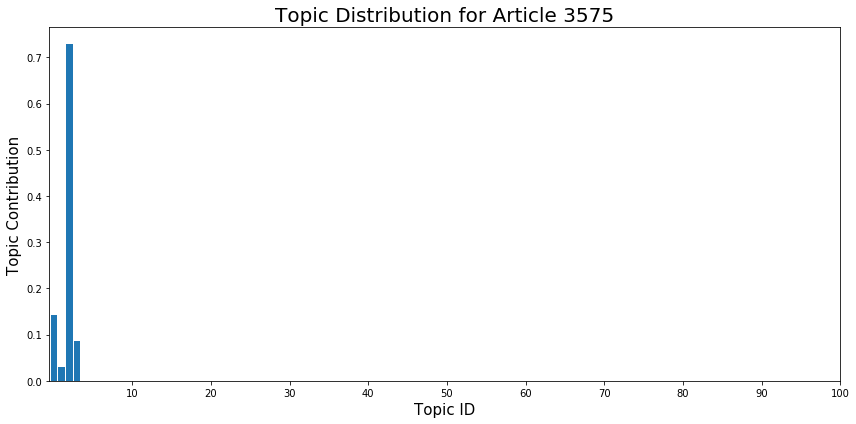

In [102]:
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(new_doc_distribution)), new_doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + str(random_article_index), fontsize=20)
ax.set_xticks(np.linspace(10,100,10))
fig.tight_layout()
plt.show()

In [103]:
for i in new_doc_distribution.argsort()[-5:][::-1]:
    print(i, lda_model.show_topic(topicid=i, topn=10), "\n")

2 [('pakistan', 0.012152566), ('police', 0.008140777), ('incident', 0.0056048715), ('security', 0.004915929), ('woman', 0.004893095), ('army', 0.0048186034), ('terrorist', 0.004605105), ('bill', 0.0045701833), ('hospital', 0.0042972364), ('delhi', 0.004243505)] 

0 [('post', 0.03206573), ('shared', 0.03167934), ('picture', 0.01719628), ('khan', 0.012367392), ('instagram', 0.01048505), ('seen', 0.009608591), ('pm', 0.0089259995), ('love', 0.008441057), ('photo', 0.0076524094), ('star', 0.0073499386)] 

3 [('world', 0.011427381), ('country', 0.00865095), ('u', 0.006252988), ('user', 0.0046973755), ('make', 0.0041278754), ('million', 0.0038492137), ('added', 0.003672456), ('work', 0.0035196403), ('percent', 0.003474973), ('china', 0.0034535497)] 

1 [('के', 0.066111825), ('में', 0.049109604), ('है', 0.037056055), ('की', 0.03670784), ('को', 0.029854259), ('ने', 0.026568623), ('और', 0.023883164), ('से', 0.02383454), ('पर', 0.021127706), ('कि', 0.017980713)] 



### COSINE similarity using tfidf vectorizer on the cleaned text

In [104]:
from itertools import chain

In [105]:
words_list=list(chain.from_iterable(docs))

In [106]:
# Cosine similarity
def cosine_sim(text1, text2):
    tfidf_score = TfidfVectorizer().fit_transform([text1, text2])
    return ((tfidf_score * tfidf_score.T).A)[0, 1]

# Most similar article
def closest_doc_name(sentence, docs):
    cos = []
    for i in range(len(docs)):
        cos.append(cosine_sim(', '.join(sentence.split(' ')),', '.join(docs[i])))
    return [titles[x] for x in np.argsort(cos)[-10:][::-1]]

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=words, stop_words=stop_words).fit(words_list)

/Users/ravissa/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [108]:
closest_doc_name('news', docs)

['News Wrap: All the top headlines from across the world',
 'Prime Minister directs withdrawal of fake news notice; onus put on Press Council of India',
 "National Wrap: All That's Trending In The Country",
 "National Wrap: All That's Trending In India",
 'National Wrap: Latest Trending News In India On March 9',
 'National Wrap: Latest Trending News In India On March 10',
 'National Wrap: Latest Trending News In India On March 6',
 'National Wrap: Latest Trending News In India On March 7',
 'National Wrap: Latest Trending News In India On March 5',
 'LIVE NOW: Republic World App - Light On Your Phone; Heavy On The News!']

### Topic modeling using LSA

In [109]:
documents = list(data['story_text'])

In [110]:
news_df = pd.DataFrame({'document':documents})

In [111]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [112]:
news_df 

,document,clean_doc
0,Hack: \tThe 34-year-old actor is not sure if h...,hack tthe year actor sure going watch upcoming...
1,The latest poster of 2.0 featuring Bollywood s...,latest poster featuring bollywood superstar ak...
2,A massive outrage has erupted over the horrifi...,massive outrage erupted over horrific rape mur...
3,The mystery surrounding Sridevi’s passing away...,mystery surrounding sridevi passing away deepe...
4,After her national award winning first film 'N...,after national award winning first film nirbas...
...,...,...
5580,"कोलंबो, 19 मार्च (एएफपी) आस्ट्रेलिया के पूर्व ...",
5581,The Supreme Court today dismissed a PIL seekin...,supreme court today dismissed seeking bihar ch...
5582,As Union Law Minister Ravi Shankar Prasad is s...,union minister ravi shankar prasad table musli...
5583,यूनिसेफ ने अपनी एक रिपोर्ट में खुलासा किया है ...,


In [113]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(5585, 1000)

In [124]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

5

In [125]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
film
 
india
 
minister
 
actor
 
khan
 
congress
 
post
 
Topic 1: 
congress
 
minister
 
modi
 
government
 
gandhi
 
prime
 
party
 
Topic 2: 
pakistan
 
india
 
indian
 
cricket
 
match
 
world
 
team
 
Topic 3: 
court
 
case
 
salman
 
police
 
khan
 
republic
 
accused
 
Topic 4: 
sridevi
 
kapoor
 
dubai
 
boney
 
janhvi
 
pakistan
 
death
 


### inspecting the above results we can conclude that Topic 0,1 is India news Topic 2 is sports news Topic 3,4 is entertainment news 